### Live Day 2 - TimeSeries ETS_EWMA ARIMA SARIMAX Fbprophet Session

In [34]:
# import required libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# lets read tesla shares data
start_date = "2017-02-27"
end_date = "2022-02-25"

tesla = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date)

# first five records
tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


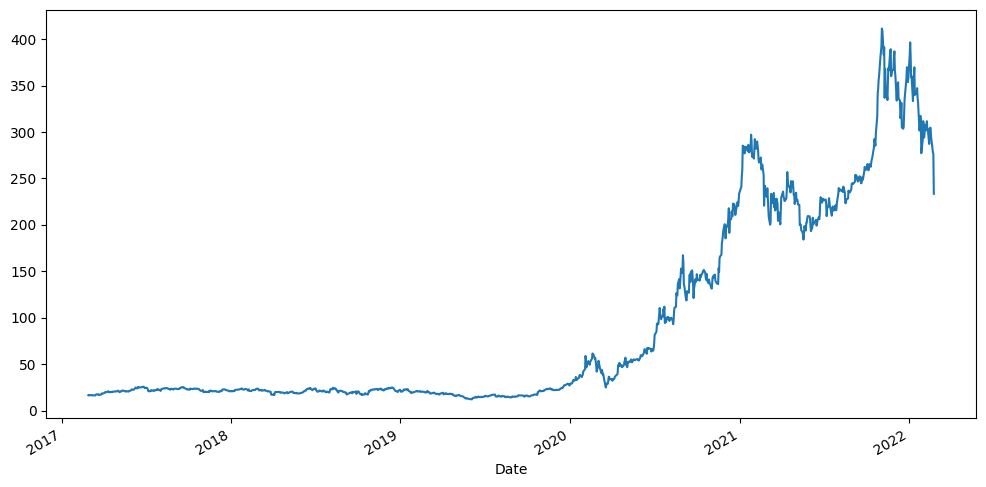

In [36]:
# simple moving average

plt.figure(figsize=(12,6))
tesla['Open'].plot()
plt.show()

In [37]:
tesla['Open: 10 days rolling'] = tesla['Open'].rolling(window=10, min_periods=1).mean()

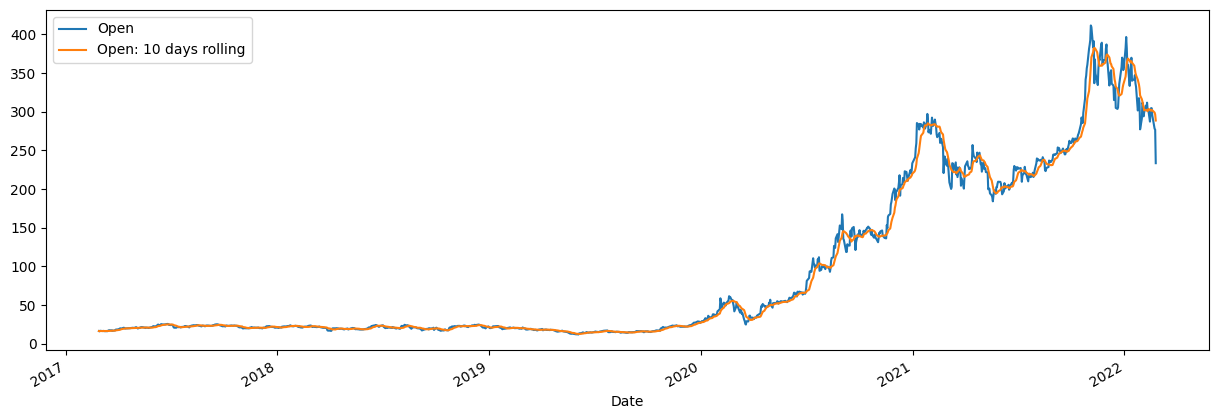

In [38]:
tesla[['Open', 'Open: 10 days rolling']].plot(figsize=(15,5))
plt.show()

In [39]:
tesla['Open: 20 days rolling'] = tesla['Open'].rolling(window=20, min_periods=1).mean()
tesla['Open: 30 days rolling'] = tesla['Open'].rolling(window=30, min_periods=1).mean()
tesla['Open: 50 days rolling'] = tesla['Open'].rolling(window=50, min_periods=1).mean()

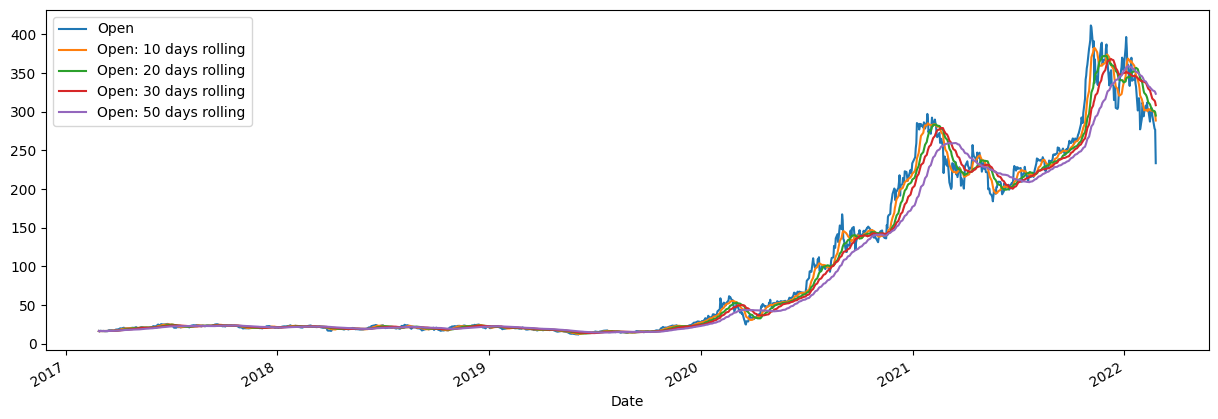

In [40]:
tesla[['Open', 'Open: 10 days rolling', 'Open: 20 days rolling',
       'Open: 30 days rolling', 'Open: 50 days rolling']].plot(figsize=(15,5))
plt.show()

<AxesSubplot:xlabel='Date'>

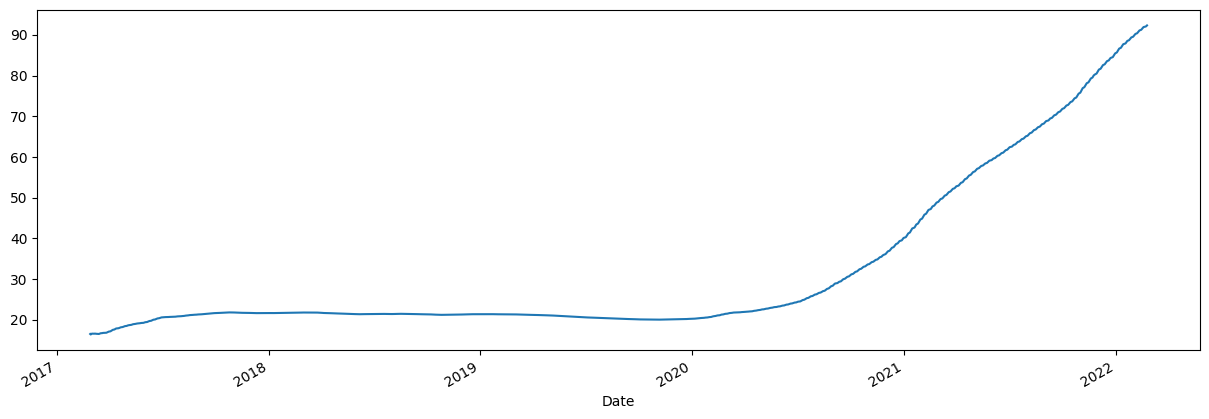

In [41]:
# expanding - Cumulative Moving Average
tesla['Open'].expanding().mean().plot(figsize=(15,5))

In [42]:
# Exponential Weighted Moving Average - EWMA


In [43]:
# EMA tesla shares
# smoothening factor = 0.1
tesla['EMA_0.1'] = tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

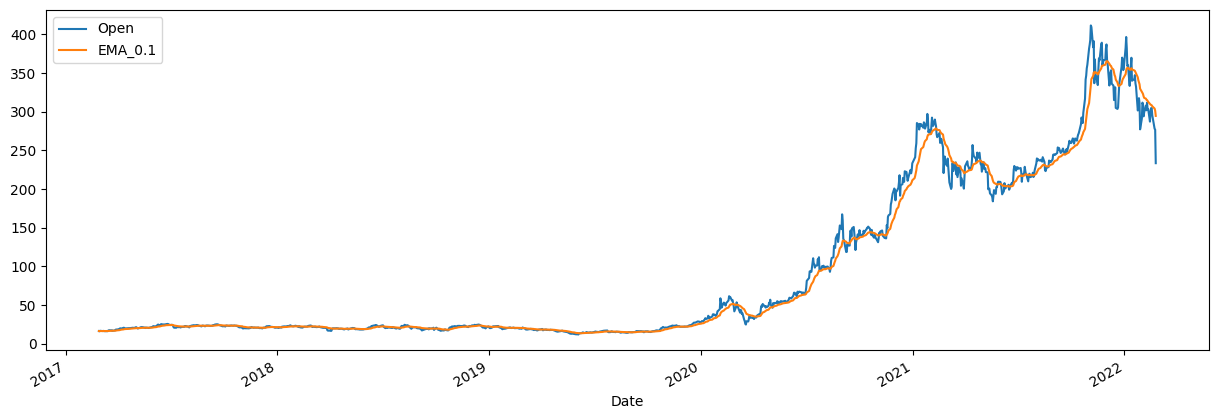

In [44]:
tesla[['Open', 'EMA_0.1']].plot(figsize=(15,5))
plt.show()

In [45]:
# smoothening factor = 0.3
tesla['EMA_0.3'] = tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

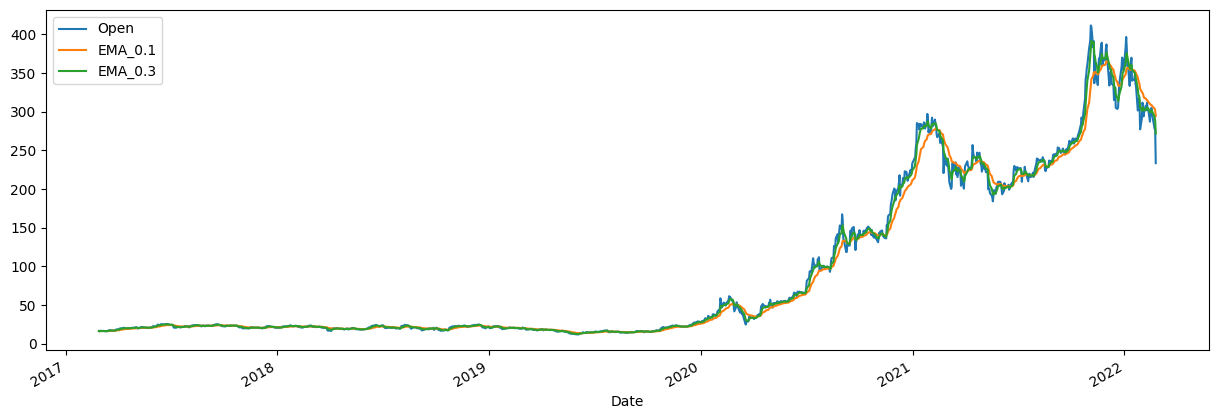

In [47]:
tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(15,5))
plt.show()

In [48]:
tesla['EMA_5days'] = tesla['Open'].ewm(span=5).mean()

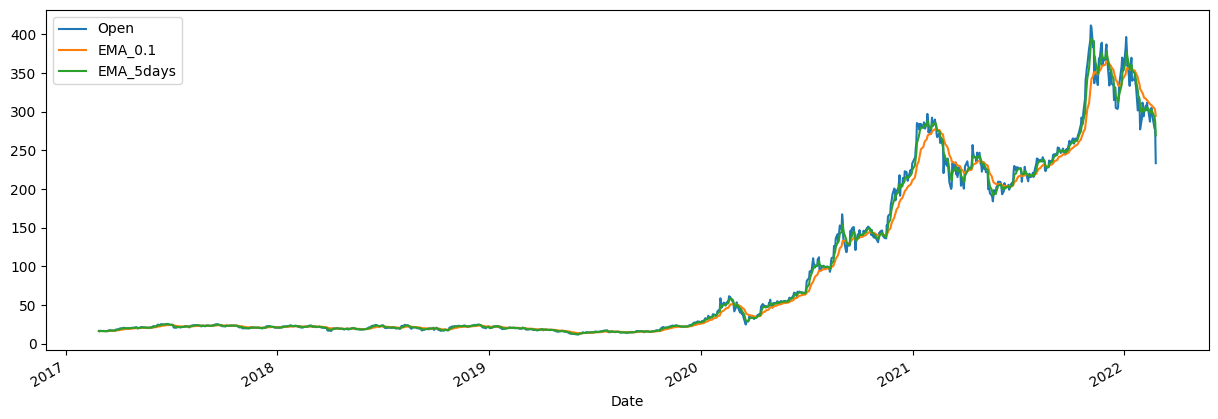

In [49]:
tesla[['Open', 'EMA_0.1', 'EMA_5days']].plot(figsize=(15,5))
plt.show()